# chapter6. 분류

-----

지도 학습에는 **분류 Classification**과 **회귀 regression**이 있다.

1. 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측

    → 0,1의 레이블을 클래스라고 하기 때문에 classification

    딱 두개의 클래스로 분류하면 `이진 분류 binary classification`
    
    셋 이상의 클래스로 분류하면 `다중 분류multiclass classification`
    


2. 회귀 : 연속적인 숫자, float를 예측하는 것.

     예시 : 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득 예측

 

-----
- 회귀와 분류를 쉽게 구별하려면, **출력 값에 연속성이 있는가**를 생각하면 됨

    연속성이 있다 → 회귀 문제 (데이터를 바탕으로 소득을 예측하는 경우 400만, 399만, 401만을 예측하는 경우의 큰 차이가 없음)
    
    연속성이 없다 → 클래스의 레이블별로 다른 정보를 의미합니다. (사과와 바나나, 오렌지 같이 사이에 중간값이 없음)

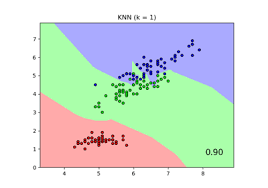

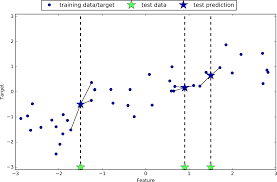

위에서부터 순서대로 K-nearest neighbors Classification, K-nearest neighbors Regression 입니다.

Classification의 경우 3개의 클래스 레이블로 데이터를 구별하는 반면,

Regression의 경우 인접한 데이터를 바탕으로 새로운 데이터의 값을 예측한다. 

### 6.1 1차원 입력 2클래스 분류

- 회귀 문제: 목표 데이터가 연속
- 분류 문제: 목표 데이터가 클래스 ex)순서는 의미가 없는 카테고리

-----
예를들어 곤충 N마리의 데이터를 생각해보자.
- 무게: X_n
- 성별: t_n (0이면 암컷, 1이면 수컷)

[리스트 6-1-(1)]로 인공 데이터 만듦

In [1]:
# 리스트 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


#### 코드해석
- 수컷과 암컷을 확률적으로 결정

- 암컷이 될 확률을 Pi= 0.5로 하여 무작위로 결정

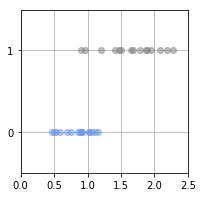

In [2]:
# 리스트 6-1-(2)
# 데이터 분포 표시 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])


# 메인 ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

#### 코드해석
(A) 처음 k=0의 처리는 t==0일 때 x와 t만을 추출하여 플롯하는 명령

(B) 분포를 표시하는 코드

x[t==0]을 사용하면 t==0을 채우는 요소 번호 x가 추출됨


#### 결정 경계(decision boundary)
- 여기서 문제를 푸는 방침은 수컷과 암컷을 분리하는 경계선을 결정하는 것이다. 

- 결정 경계가 정해지면 새로운 질량 데이터가 결정 경계보다 작으면 '암컷'으로 에상하여, 크다면 '수컷'으로 예측할 수 있다.

#### 그럼 어떻게 경계를 결정하면 좋을까?
- 우선 선형 회귀 모델을 사용해보자
- 클래스를 0과 1의 값으로 해석하여 데이터의 분포에 직선을 맞추는 것
- 그리고 그 직선이 0.5의 값을 갖는 곳을 결정 경계로 함
- 그러나 잘 작동하지 않는 경우가 많은데, 질량이 충분히 커서 확실하게 수컷으로 판정할 수 있는 데이터 점에서도 직선이 데이터 점에 겹쳐져 있지 않기 때문에 오차가 발생
- 이 오차를 해소하려는 힘이 작용하기 때문에 결정 경계가 수컷 쪽에 끌려감

## 확률의 개념

확률(Probability)은 해당 사건(event) 이 일어날 가능성을 의미

- Frequentist probability (사전확률)

    - 해당 사건의 빈도수를 따져 그 사건이 발생할 가능성을 의미. 보통 실험적인 성향을 갖는 반복되는 시도를 통해 사건의 빈도수를 측정.
    
- Bayesian Probability (사후확률 )

    - 사건발생후(관측후)그것이 어떤 원인일 것이라고 기대되는 확률, 즉 결과로부터 원인이 무엇일까라는 역방향 확률(사전확률의 역확률)
    - likelihood에서 사후확률의 개념을 이용한다


> 어떤 사건 A 가 발생할 확률 P(A) 를 사전확률이라고 할 때, 사전 확률 P(A)가 발생했을때 사건 B 가 발생할 확률 P(B|A) 를 조건부 확률이라고 한다. 사후 확률은 순서를 바꿔서 사건 B가 발생했을 때 사건 A가 발생했을 확률 P(A|B)를 말한다.
>
>ex) 우산과 비의 확률
<!-- 
입력변수 $x_n$ (데이터)

목표변수$t_n$ (클레스, 카테고리, 라벨 <-분류문제의 경우)
 -->
 
 
1. `질량이 x<0.8g`: 확실히 그 곤충은 암컷

2. `질량이 1.2g<x`: 확실히 그 곤충은 수컷

3. `질량 x가 0.8g<x<1.2g`: 100%로 예측 불가능

3과 같은 경우는 모호성을 확률로 포함한 예측을 한다.

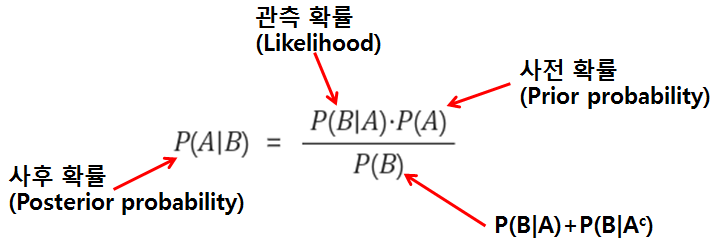

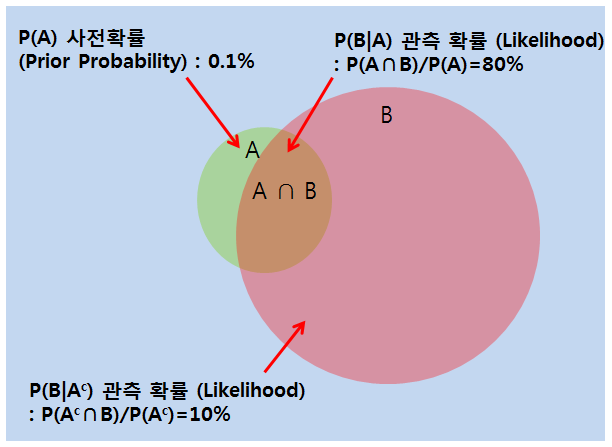


#### 조건부 확률
- 한 사건이 일어났다는 전제 하에서 다른 사건이 일어날 확률
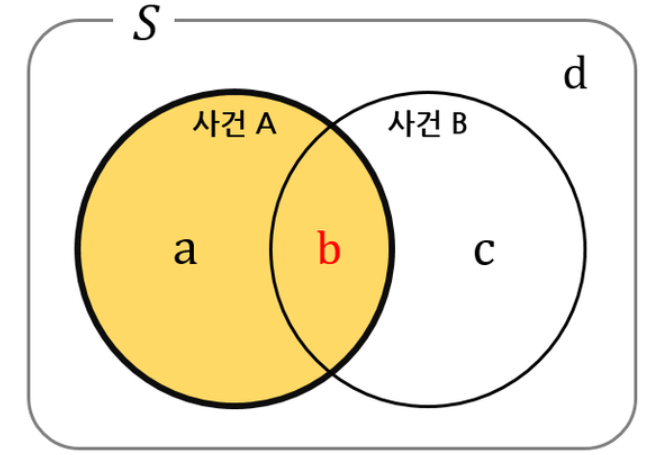

실제로 P(B)를 모르는 경우가 많기 때문에 P(A), P(not A), P(B|A), P(B|not A)를 가지고 P(B)를 유추해야 한다.

아래 수식은 P(B)를 유추하는 수식이다.
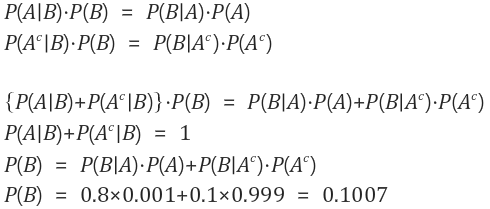

- 사건 A가 발생했다는 전제 하에 사건 B가 발생할 확률

$$ P(B|A) = \frac {n(A \cap B)}{n(A)} $$

위 벤다이어그램에서 N = a+b+c+d라고 하면
$P(B|A) = \frac {b}{a+b} = \frac {\frac {b}{N}}{\frac {a+b}{N}} = \frac {P(A \cap  B)}{P(A)} $
- 사건 B가 발생했다는 전제 하에 다른 사건 A가 발생할 확률

$$ P(A|B) = \frac {n(A \cap B)}{n(B)} $$

-----

x에 대해 t=1(수컷)일 확률은 조건부 확률로 나타낼 수 있음

$$ p(t=1|x) $$

- 이 조건부 확률은 x의 함수로 볼 수 있다.
- 모든 x에 대해 플롯하면 계단같은 그래프가 됨
- 이 계단형 그래프는 클래스 분류의 답을 나타낸다고 생각할 수 있음
- 어떤 클래스로 분류할지 명확하게 예측할 수 없는 불확실한 영역도 확률적인 예측으로 나타냄
- 이 방법은 부로학실성을 명확히 표현할 수 있다는 점에서 직선에 의한 피팅보다 우수함

#### 그런데, 결정 경계를 어디에 그어야 할까?
- 결정 경계의 오른쪽을 수컷, 왼쪽을 암컷으로 예측할 때 확률이 높아지는 결정 경계를 설정해야 함
- 그렇게 되면 $ P(t=1|x)=0.5 $가 되는 x가 결정 경계이다. (이 예에서는 x = 1.2가 결정경계)

<font color=blue> **&rarr; 즉, 확률로 나타내는 것이 낫다**</font> 는 것을 설명하기 위해 데이터의 실제 분포를 알고 있다는 특수한 상황을 가정하였음. 하지만 실제 분포는 알 수 없으므로 추정 대상

### 6.1.3 최대가능도법

#### 최대가능도법  : 주어진 입력 데이터 x에 대해 바레 데이터 x가 생성될 확률(가능도)이 가장 커지는 w를 추정치로 한다.
-----
Q. t는 0또는 1 값을 갖는 데이터이다. 어떤 x의 범위에 주목하여, '처음 3회가 t=0이고 4회째는 t=1이다' 라고 하면 t=1이 될 확률은 얼마나 될까?

$P(t=1|x)=w $로 하여 w를 구하자.
t=0이 될 확률은 (1-w)이고, t=1이 될 확률은 w이다.
t=0이 3회, t=1이 1회 나올 확률(가능도)는

$ P(T=0,0,0,1|x)= (1-w)(1-w)(1-w)w $
위 식이 최대가 되는 w를 구하면 된다.(답 w = 0.25)

### Q. 최대 가능도법을 왜 사용할까?

현실에서는 데이터가 매우 많고 또 데이터 차원이 높은 경우가 많기때문에 확률 분포를 알아내는 것이 쉽지가 않다. 

(현실에서는 관측 값(데이터)만 주어지고 확률 분포를 알아내야 하는 경우가 대부분)

데이터의 확률 분포를 알고 있다면, 우리는 해당 분포에 확률 변수를 넣어 바로 확률을 계산할 수 있다.

그리고 우리는 데이터의 확률 분포가 무엇인지 알 수 없으니까 미리 특정 확률 분포로 가정하고 시작하는 것이다. ex)기저 함수

### Q. 딥러닝에서는 어떻게 작동할까?

=> 확률론적인 관점에서 보면 MLE를 통해 θ 를 업데이트해서 확률 모델을 최대화하는 것이다.
딥러닝 모델은 가설을 세우고 그 가설이 최대화되는 θ를 찾도록 역전파로 업데이트한다.

### Q. 확률과 최대우도의 차이는?
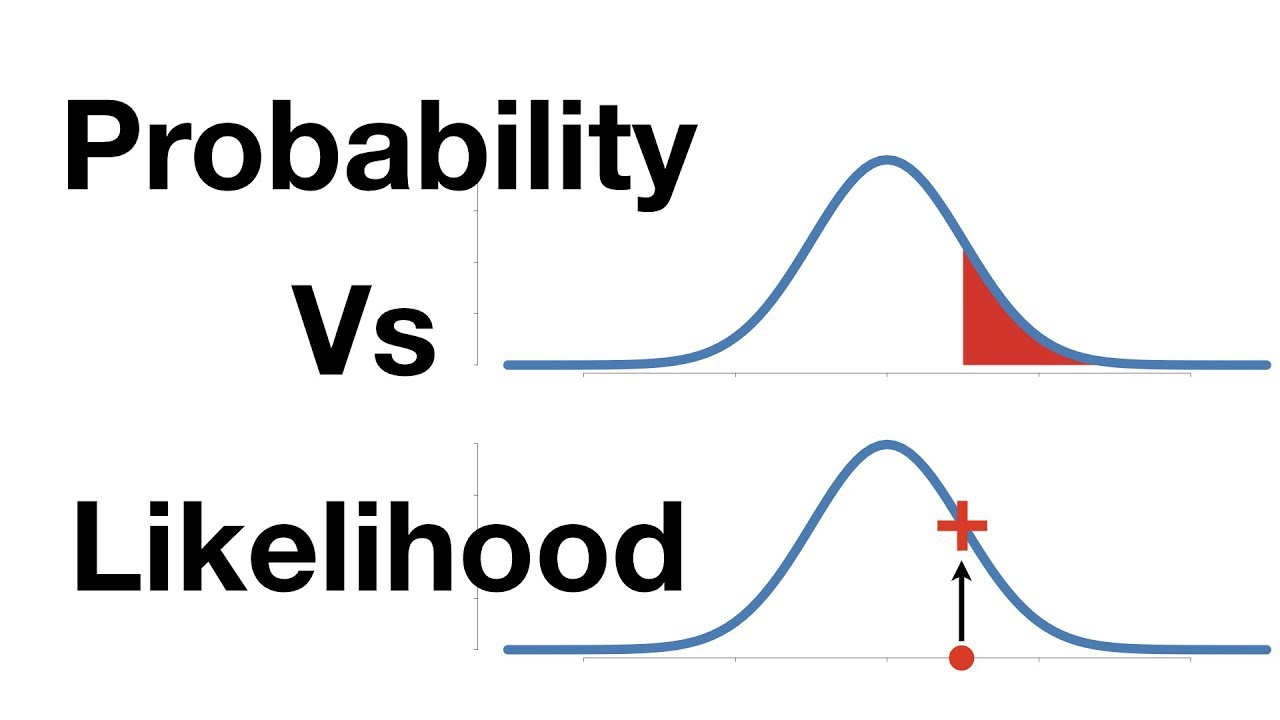
n번의 독립 시행을 거쳐 얻은 데이터에 대한 우도는

모델에 관측된 데이터를 모두 넣어, 각각에 대한 확률을 뽑고

얻어낸 확률들을 모두 곱함으로써 얻을 수 있다.

그 수치가 높다면? 그 모델은 해당 데이터를 잘 표현/설명하는 것이라 할 수 있다.

(데이터의 확률분포를 잘 흉내내는 것)

그런데, 확률들이 곱해지다보면 underflow 현상이 일어날 수 있다.

이를 방지하기 위해 log를 취함으로써 곱을 합으로 바꿀 수 있다. (Log Likelihood)

* 가우시안 분포에서는 지수를 제거할 수 있는 이점

따라서, 어떤 확률분포를 흉내내는 모델을 만들고 싶다면

1. 흉내내고 싶은 데이터 분포에서 데이터를 샘플링하고

2. 랜덤 파라미터를 가지는 모델을 이용해 확률 분포 함수를 생성 후

   (가우시안 분포를 가정한다면 파라미터로 랜덤한 평균, 표준편차 설정)

   (뉴럴넷의 W들도 결국 임의의 확률분포를 표현하는 파라미터라 할 수 있음 ; 뉴럴넷 == 확률분포함수)

3. 주어진 모델과 데이터를 이용해 확률값들을 뽑아 Likelihood를 계산하고

4. 2-3 반복 후 Likelihood를 최대화하는 모델 선택

딥 뉴럴넷은

x ~ P(x) 가 주어졌을 때 (== 해결하고자 하는 문제의 Ground Truth 분포 P(x)에서 샘플링한 데이터 x)

조건부 확률 분포 P(y given x ; θ)를 나타낸다.

따라서 NLL을 최소화 하는 파라미터를 찾음으로써 최적화가 가능하다.

### 6.1.4 로지스틱 회귀 모델

- 여기까지 데이터를 균일한 분포에서 생성된 것으로 생각했다
- $P(t=1|x)$이 취급하기 편한 계단식 분포였지만 실제 데이터가 균일하게 분포되는 경우는 거의 없다.
- 조건부 확률 p(t=1|x)는 로지스틱 회귀 모델로 나타낸다

#### 로지스틱 회귀 모델
로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.

$ y = w_0x+ w_1 $

$ y = \sigma (w_0x  +w_1)$ = $ \frac {1}{1 + exp(-(w_0x + w_1))} $

직선 모델의 큰 양의 출력은 1에 가까운 값이 되고 절대값이 큰 음의 출력은 0에 가까운 값으로 변환되어 직선의 함수는 0과 1의 범위에 들어감

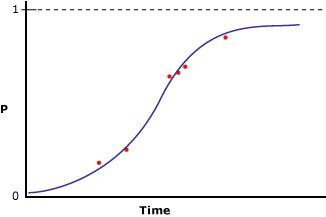

#### 로지스틱 회귀 무델의 특징
- 선형 함수를 시그모이드 함수 안에 넣은 것이다.


1. 이항 분류 (Binary Classification)

    - 가정: sigmoid 함수
    - 사용 용도: 주로 주간층의 활성화함수
    - 손실함수: binary cross entropy
    
    
2. 다항 분류(Multinomial Classification)

    - 가정: softmax 함수
    - 사용 용도: 주로 출력층 함수
    - 손실함수: cross entropy
    

In [3]:
# 리스트 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

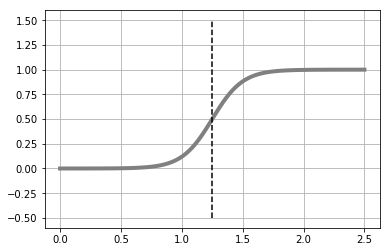

In [4]:
# 리스트 6-1-(4)
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 결정 경계
    i = np.min(np.where(y > 0.5)) # (A)
    B = (xb[i - 1] + xb[i]) / 2 # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B


# test
W = [8, -10]
show_logistic(W)

#### 결과 해석
- 결정 경계는 y = 0.5가 되는 x의 값
- (A)의 np.where(y>0.5)는 y>0.5를 만족하는 요소 번호를 모두 반환하는 명령문이다.
- i= np.min(np.where(y>0.5)) 명령으로 y>0.5를 만족하는 요소 번호 중에서 가장 작은 인덱스가 i로 들어감
- 즉 i는 y가 0.5을 넘은 직후의 요소 번호


- 평균 교차 엔트로피 오차를 계산하는 함수 **cee_logistic(w,x,t)**를 만듦

### 6.1.5 교차 엔트로피 오차
#### 정보량 수식의 이해
> #### 정보량의 특성
>- 정보량은 항상 0보다 크다
>- 항상 발생하는 사건의 정보량은 0이다
>- 자주일어나는 사건일수록 정보량은 0에 가깝다
>- 독립적인 사건들의 정보량 합은 각 사건의 합이어야 한다

> 위의 성질들은 모두 로그의 성질이 만족한다


### 엔트로피
#### 엔트로피의 개념

정의 : 확률변수의 불확실성을 수치로 나타낸것(어떤 상태의 불확실성)이다.

이해 : 기댓값 = SUM( 확률 x 특정값(정보량) )




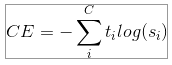

ti 는 ground truth (정답), si는 각 클래스 i에 대한 CNN 마지막 층의 아웃풋인 score 벡터의 i번째 요소입니다.

(0, 1) 사이 계산 범위를 맞추기 위하여 스코어는 위에서 설명한 sigmoid activation function과 종종 같이 붙어서 CE loss와 계산됩니다.

특별히 binary classfication 문제에서는 (즉, C' = 2), 식을 전개해보면 다음과 같이 나옴을 알 수 있습니다

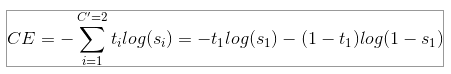

#### Categorical Cross-Entropy Loss
Softmax activation 뒤에 Cross-Entropy loss를 붙인 형태로 주로 사용하기 때문에 Softmax loss 라고도 불립니다.

→ Multi-class classification에 사용됩니다.

 

우리가 분류문제에서 주로 사용하는 활성화함수와 로스입니다. 분류 문제에서는 MSE(mean square error) loss 보다 CE loss가 더 빨리 수렴한 다는 사실이 알려져있습니다. 따라서 multi class에서 하나의 클래스를 구분할 때 softmax와 CE loss의 조합을 많이 사용합니다.

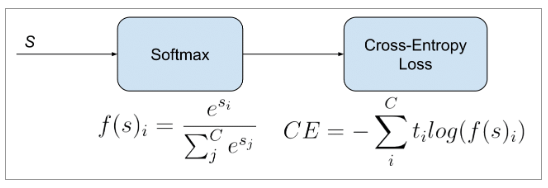

널리 쓰이는 프레임워크 3가지에서는 multi-class에서 쓸 수 있는 cross entropy loss를 정의해놓았습니다.
물론 이는 binary class에서도 적용이 가능합니다. 클래스가 2개일 때 sigmoid와 softmax는 같은 식이 됩니다.

- Caffe: SoftmaxWithLoss Layer
- Pytorch: torch.nn.CrossEntropyLoss
- TensorFlow: tf.nn.softmax_cross_entropy (deprecated) → tf.nn.softmax_cross_entropy_v2
 
#### Binary Cross-Entropy Loss

Sigmoid activation 뒤에 Cross-Entropy loss를 붙인 형태로 주로 사용하기 때문에 Sigmoid CE loss라고도 불립니다.

→ Multi-label classification에 사용됩니다.

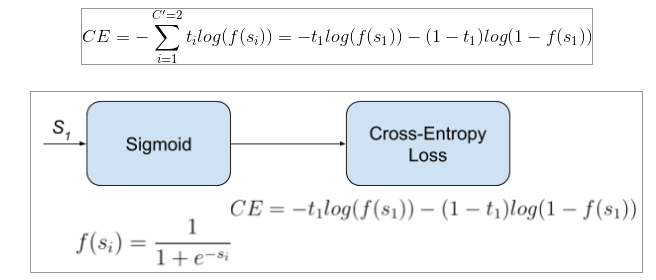

- Caffe: Sigmoid Cross-Entropy Loss Layer
- Pytorch: torch.nn.BCEWithLogitsLoss
- TensorFlow: tf.nn.sigmoid_cross_entropy_with_logits

In [5]:
# 리스트 6-1-(5)
# 평균 교차 엔트로피 오차 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee


# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

#### 평균 교차 엔트로피 오차 모양 확인

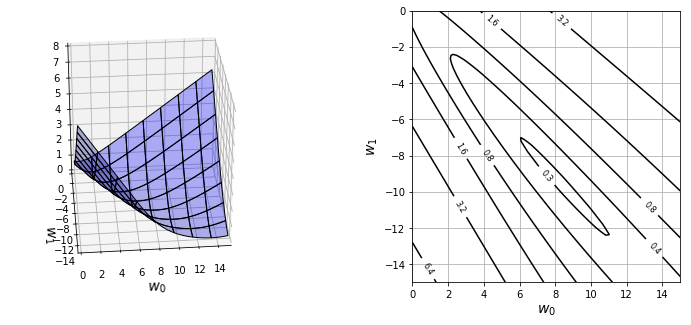

In [6]:
# 리스트 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D


# 계산 --------------------------------------
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)


# 표시 --------------------------------------
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

평균 교차 엔트로피 오차 함수는 보자기의 대각선 모서리를 잡고 들어올리는 모향을 하고 있다.

최소치는 $ w_0 = 9, w_1 = -9 $ 근처에 있을 것 

#### 6.1.6 학습 규칙의 도출

- 교차엔트로피 오차를 최소화하는 매개 변수의 분석해는 구할 수 ㅓㅄ다.
- $y_n$이 비선형의 시그모이드 함수를 포함하고 있기 때문
- 지금까지와 같은 경사 학아법을 사용하여 수치적으로 구하는 것을 고려
- 경사 하강법을 사용하기 위해 매개변수를 편미분해야 했다.

#### 로지스틱 회귀 모델의 학습

- 로지스틱 회귀 모델

$y_n = \sigma(a_n) = \frac {1}{1+exp(-a_n)} $ ,  $a_n = w_0x+w_1 $

- 평균 오차 엔트로피 오차 함수

E(w) = $\displaystyle\sum_{n=0}^{N-1}{(t_n\log y_n + (1-t_n)log(1-y_n)}$

- 학습 규칙에 사용하는 편미분

$ \frac {\partial E}{\partial w_0} $ = $ \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}(y_n - t_n)x_n $ ,
$ \frac {\partial E}{\partial w_1} $ = $ \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}(y_n - t_n) $

### 6.1.7 경사 하강법에 의한 해

scipy.optimize 라이브러리에 포함된 minimize()함수로 경사하강법 시도

In [7]:
# 리스트 6-1-(7)
# 평균 교차 엔트로피 오차의 미분 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee


# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

- minimize()의 인수로는 교차엔트로피 함수 cee_logistic 
- w의 초기값 w_init, args = (x,t)에는 cee_logistic의 w이외의 인수 지정
- jac=dcee_logistic에는 미분함수를 지정
- method = 'CG'로 켤레 기울기법 이라는 경사 하강법의 일종을 지정함

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


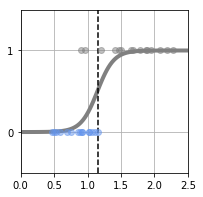

In [8]:
# 리스트 6-1-(8)
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # (A)
    return res1.x


# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

#### 결과해석

- 모델의 출력은 '주어진 x에 대해 t=1 (수컷)일 가능성' P(t=1|x)를 나타내고 있다.
- 이 모델의 가장 큰 장점은 출력값이 P(t=1|x)라는 조건부 확률(사후 확률)을 근사하려는 점
- 모호성을 포함하여 예측함
- 결정 경계는 P(t=1|x) = 0.5가 되는 x = 1.15g
- 직선 모델을 제곱 오차 최소화로 피팅했을 때의 경계 결정(1.24g)보다 약간 왼쪽으로 돌아왔다.

#### 6.2 2차원 입력 2클래스 분류

다음은 입력 데이터가 2차원인 경우로 확장

#### 6.2.1 문제 설정
데이터를 재설정하여 2차원 입력으로 데이터를 새로 만듦

[리스트 6-2-(1)]에서 2클래스의 분류와 3클래스의 분류 데이터를 함께 만듦

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


- 데이터의 수는 N= 1000으로 입력 데이터는 Nx2의 x, 그 반면 2클래스 분류의 클래스 데이터는 N x 2의 T2에, 3클래스 분류 클래스 데이터는 N x 3 의 T3에 저장

In [10]:
# 리스트 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

- 클래스 데이터 T2의 처음 5개는 [리스트 6-2-(3)]과 같다.

In [11]:
# 리스트 6-2-(2)
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [12]:
# 리스트 6-2-(3)
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


- 이는 위에서 차례로 클래스 1,0,0,0,1,0에 속산하는 의미
- 1인 열 번호가 클래스 번호를 나타냄
- T3의 처음 5개 프린트

In [13]:
# 리스트 6-2-(4)
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


- T2의 경우와 마찬가지로 위에서 순서대로 클래스 1,0,0,1,0에 속해 있다는 의미
- 이처럼 목적 변수 벡터 $t_n$ 의 k번째 요소만 1로, 그 외에는 0으로 표기하는 방법을 `1-of-k 부호화`라고 함

- 데이터는 3클래스용 T3을 만들고, 클래스 2를 클래스 1에 통합하여 T2로 하고 있다.
#### 데이터 생성 원리
- 어떤 클래스에 소속하는 확률을 Pi = np.array([0.4,0.8,1])로 설정
- 0~1 사이의 균일한 분포에서 난수를 생성하여 wk에 넣고, 그것이 Pi[0] 보다 작으면 클래스 0, Pi[1]보다 작으면 클래스 1, Pi[2]보다 작으면 2
- 클래스가 결정된 뒤, 클래스마다 각각 다른 가우스 분포로 입력 데이터 생성

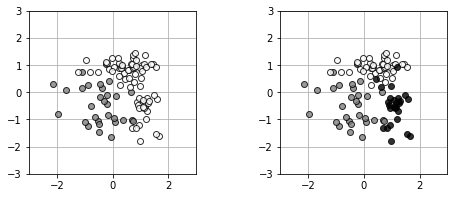

In [14]:
# 리스트 6-2-(5)
# 데이터 표시 --------------------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)


# 메인 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)


plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 6.2.2 로지스틱 회귀 모델
- 로지스틱 회귀 모델은 1차원 입력 버전에서 간단히 2차원 입력 버전으로 확장할 수 있음

$ y = \sigma(a) $

$ a = w_0x_0 + w_1x_2 + w_2 $

a의 입력 총합은 위와 같다.

- 이번 모델의 출력 y는 클래스가 0인 확률 P(t=0|x)를 근사하는 것
- 모델의 매개 변수가 하나 증가하여 w_0, w_1, w_2 세가지 이다.



In [15]:
# 리스트 6-2-(6)
# 로지스틱 회귀 모델 -----------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

- 정의한 로지스틱 회귀 모델과 데이터를 3D로 표시
- w = [-1, -1, -1]을 선택한 경우의 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시

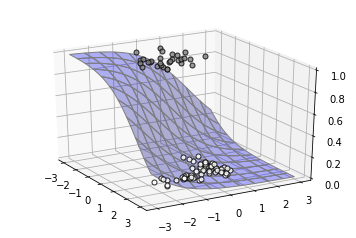

In [16]:
# 리스트 6-2-(7)
# 모델 3D보기 ------------------------------
from mpl_toolkits.mplot3d import axes3d


def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)


def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)


# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

- 로지스틱 회귀 모델의 등고선 표시 시각화

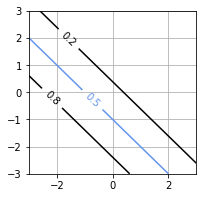

In [17]:
# 리스트 6-2-(8)
# 모델 등고선 2D 표시 ------------------------


def show_contour_logistic2(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.grid(True)


# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)

- 모델의 평균 교차 엔트로피 오차 함수는 아래 식 자체를 사용

$ E(w) = - \frac {1}{N} logp(T|X) = \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (t_n logy_n + (1-t_n)log(1-y_n)) $

여기서 데이터베이스에는 1-of-k 부호화를 사용하는데, 2클래스 분류 문제이므로 T의 0열째 $t_n0$를 $t_n$으로 두고 1이면 클래스 0, 0이면 클래스 1로, 앞 절과 마찬가지로 문제를 처리할 수 있다 .

- 상호 엔트로피 오차 계산 함수 정의

In [18]:
# 리스트 6-2-(9)
# 크로스 엔트로피 오차 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

- 매개변수의 편미분을 구하면 다음과 같다.

$$ \frac {\partial E}{\partial w_0} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)x_0 $$

$$ \frac {\partial E}{\partial w_1} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)x_1  $$

$$ \frac {\partial E}{\partial w_2} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n) $$

- 편미분 계산하는 함수 정의
- 실행하면 w = [-1, -1, -1]의 경우 편미분 값이 반환

In [19]:
# 리스트 6-2-(10)
# 크로스 엔트로피 오차의 미분 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee


# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

- 평균 교차 엔트로피 오차가 최소가 되도록 로지스틱 회귀 모델의 매개변수를 구하고, 결과를 표시

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


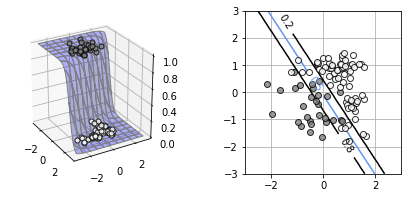

In [20]:
# 리스트 6-2-(11)
from scipy.optimize import minimize


# 로지스틱 회귀 모델의 매개 변수 검색 -
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x


# 메인 ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

#### 결과해석
- 앞 절과 마찬가지로 minimize()에 미분 함수도 전달하여 켤레 기울기법으로 매개변수를 구함
- 목표대로 분포를 분리하는 곳에서 결정 경계가 그려진 것을 확인
- 사용한 로지스틱 회귀 모델의 시그모이드 함수의 내용은 면 모델
- 이 면은 시그모이드 함수에 의해 0과 1 사이에 들어가는 것으로 생각
- 평면을 넣었을 뿐이므로 이 모델의 결졍 경계는 반드시 직선이다.

### 6.3 2차원 입력 3클래스 분류

흔히 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다. 이외에, 두 개 이상의 범주를 가지는 문제가 대상인 경우엔 다항 로지스틱 회귀 (multinomial logistic regression) 또는 분화 로지스틱 회귀 (polytomous logistic regression)라고 하고 복수의 범주이면서 순서가 존재하면 서수 로지스틱 회귀 (ordinal logistic regression) 라고 한다.[2] 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

- 예를 들어 3클래스의 분류 문제라면 3개의 클래스에 대응하는 입력 총합 $a_k(k=0,1,2)$ 를 고려.
$$ a_k = w_k0 x_0 + w_k1  (k = 0,1,2)$$

- 2차원 입력을 고려하기 때문에 x = [x0, x1] 이지만, 항상 1의 값을 갖는 세번쨰 입력 x2= 1를 가정하여 식을 확장함

$ a_k = w_k0 x_0 + w_k1 x1+ w_k2 x_2 $ = $\displaystyle\sum_{i=0}^{D}w_kix_i$   $(k = 0,1,2)$

- 3클래스용 로지스틱 회귀 모델 logistic3을 구현

In [21]:
# 리스트 6-2-(12)
# 3 클래스 용 로지스틱 회귀 모델 -----------------


def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y


# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


- 이 모델의 매개 변수 w의 요소 수는 9개
- minimize에 대응하기 위해 입력 w는 3x3 행렬을 늘여놓은 요소 수 0개의 벡터로 취급
- test에서는 위부터 3개의 입력 데이터 x[:3, 0]와 시험적으로 결정한 w에 대한 출력을 확인
- 출력은 Nx3의 행렬로 표현한 y로, 같은 라인의 요소(가로 줄의 수)를 더하면 1이 됨

In [22]:
# 리스트 6-2-(13)
# 교차 엔트로피 오차 ------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288

### 6.3.3 경사하강법에 의한 해

경사하강법으로 E(w)를 최소화하는 w를 구하려면 각 E(w)의 각 $w_ki$에 관한 편미분이 필요하다.

각 매개 변수에 대한 미분값을 출력하는 함수 dcee_logistice 정의

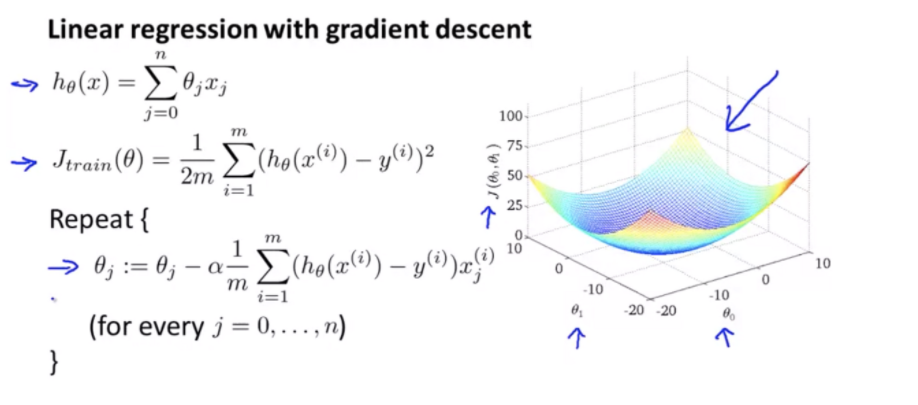

W0와 W1을 찾기 위해서 W0와 W1의 초기값을 설정을 한뒤에 반복 연산(예: for loop, while loop)을 돌린다. 새로운 W를 위해 현재 위치 W에서 Learning rate(알파)와 기울기를 뺀다. 'Gradient의 알파만큼 반대로 움직여라'는 것이며, 이를 경사하강법(Gradient Descent)이라고 한다.

- gradient vector는 변수 d개에 대해 각각 편미분 한 것을 한 번에 표시한다.
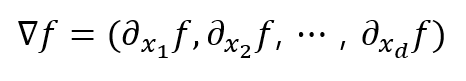

저 역삼각형 기호는 nabla라고 하며 gradient vector임을 나타내는 기호이다. f'(x) 대신 nabla를 사용하여 변수 x=(x1, x2, ···, xd)를 동시에 update할 수 있다.
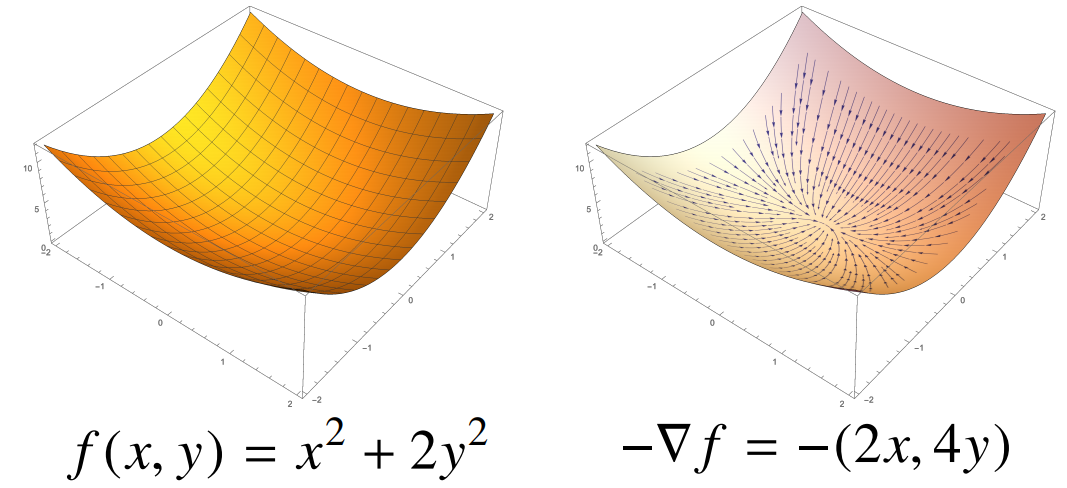

위의 그림을 보면 gradient vector는 각 점에서 가장 빨리 감소하는 방향으로 흐르는 것을 알 수 있다.

출처: https://amber-chaeeunk.tistory.com/71 [채채씨의 학습 기록]

In [23]:
# 리스트 6-2-(14)
# 교차 엔트로피 오차의 미분 ------------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)


array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

- 매개 변수 검색을 수행하는 함수

In [24]:
# 리스트 6-2-(15)
# 매개 변수 검색 -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

- 등고선에 결과를 표시하는 함수 show_contour_logistic3 만듦

In [11]:
# 리스트 6-2-(16)
# 모델 등고선 2D 표시 --------------------
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)


    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

- show_contour_logistic3은 가중치 매개 변수 w를 전달하면 표시할 입력 공간을 30x30으로 분할하여 모든 입력에 대해 네트워크의 출력을 ㅗ학인
- 각 카테고리에서 0.5 또는 0.9 이상의 출력을 얻을 수 있는 영역을 등고선으로 표시

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


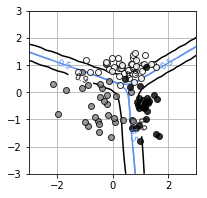

In [26]:
# 리스트 6-2-(17)
# 메인 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

#### 결과 해석
- 클래스 사이에 경계선이 잘 그어져있다.
- 이 다중클래스 로지스틱 회귀 모델에서는 클래스 간 경계선이 직선의 조합으로 구성
- 즉, 이 모델의 장점은 모호성을 조건부 확률(사후 확률)로 근사하는 것에 있음